In [14]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
from scipy.stats import norm 
import math
from matplotlib import gridspec

In [2]:
# reading in the stroke file & seeing first few rows of data
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
# cleaning up dataframe

# adding headers
stroke.columns = ['ID', 'Gender', 'Age', 'Hypertension', 'Heart Disease', 'Ever Married', 'Work Type', 'Residence Type', 'AVG Glucose Level', 'BMI', 'Smoking Status', 'Stroke']



,ID,Gender,Age,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,AVG Glucose Level,BMI,Smoking Status,Stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [8]:
# obtain descriptive statistics for the columns
stroke.describe()

,ID,Age,Hypertension,Heart Disease,AVG Glucose Level,BMI,Stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
# count of the missing values per column
stroke.isnull().sum()

ID                     0
Gender                 0
Age                    0
Hypertension           0
Heart Disease          0
Ever Married           0
Work Type              0
Residence Type         0
AVG Glucose Level      0
BMI                  201
Smoking Status         0
Stroke                 0
dtype: int64

In [10]:
# filling missing data in BMI column with "not provided"
stroke.fillna("not provided")


,ID,Gender,Age,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,AVG Glucose Level,BMI,Smoking Status,Stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,not provided,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,not provided,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


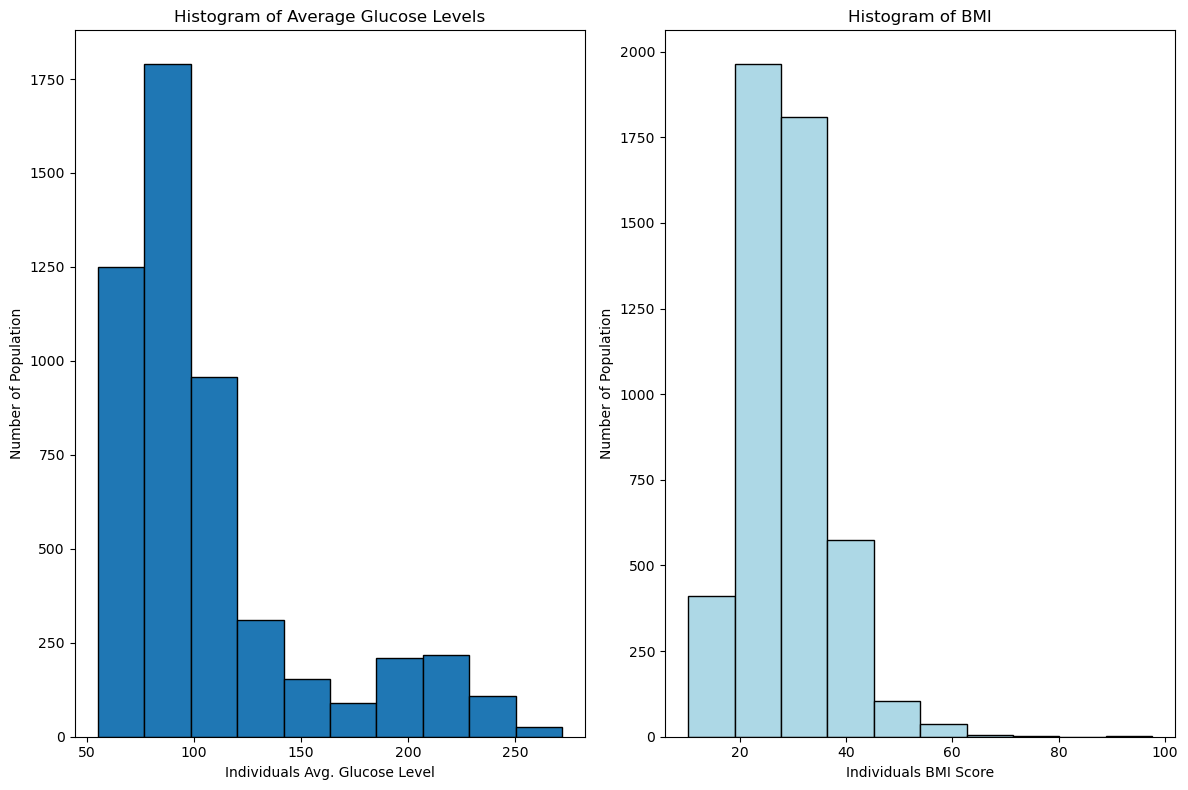

In [25]:
# EDA - looking at the histogram of the non binary variables

# creating the grid space
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(nrows=1, ncols=2)

# Histogram of AVG Glucose Levels
ax1 = fig.add_subplot(gs[0, 0])
ax1.hist(stroke['AVG Glucose Level'], edgecolor='black')
ax1.set_title('Histogram of Average Glucose Levels')
ax1.set_xlabel('Individuals'' Avg. Glucose Level')
ax1.set_ylabel('Number of Population')
#plt.show()

# Histogram of BMI
ax2 = fig.add_subplot(gs[0, 1])
ax2.hist(stroke['BMI'], color='lightblue', edgecolor='black')
ax2.set_title('Histogram of BMI')
ax2.set_xlabel('Individuals'' BMI Score')
ax2.set_ylabel('Number of Population')
#plt.show()

fig.tight_layout()
plt.show()

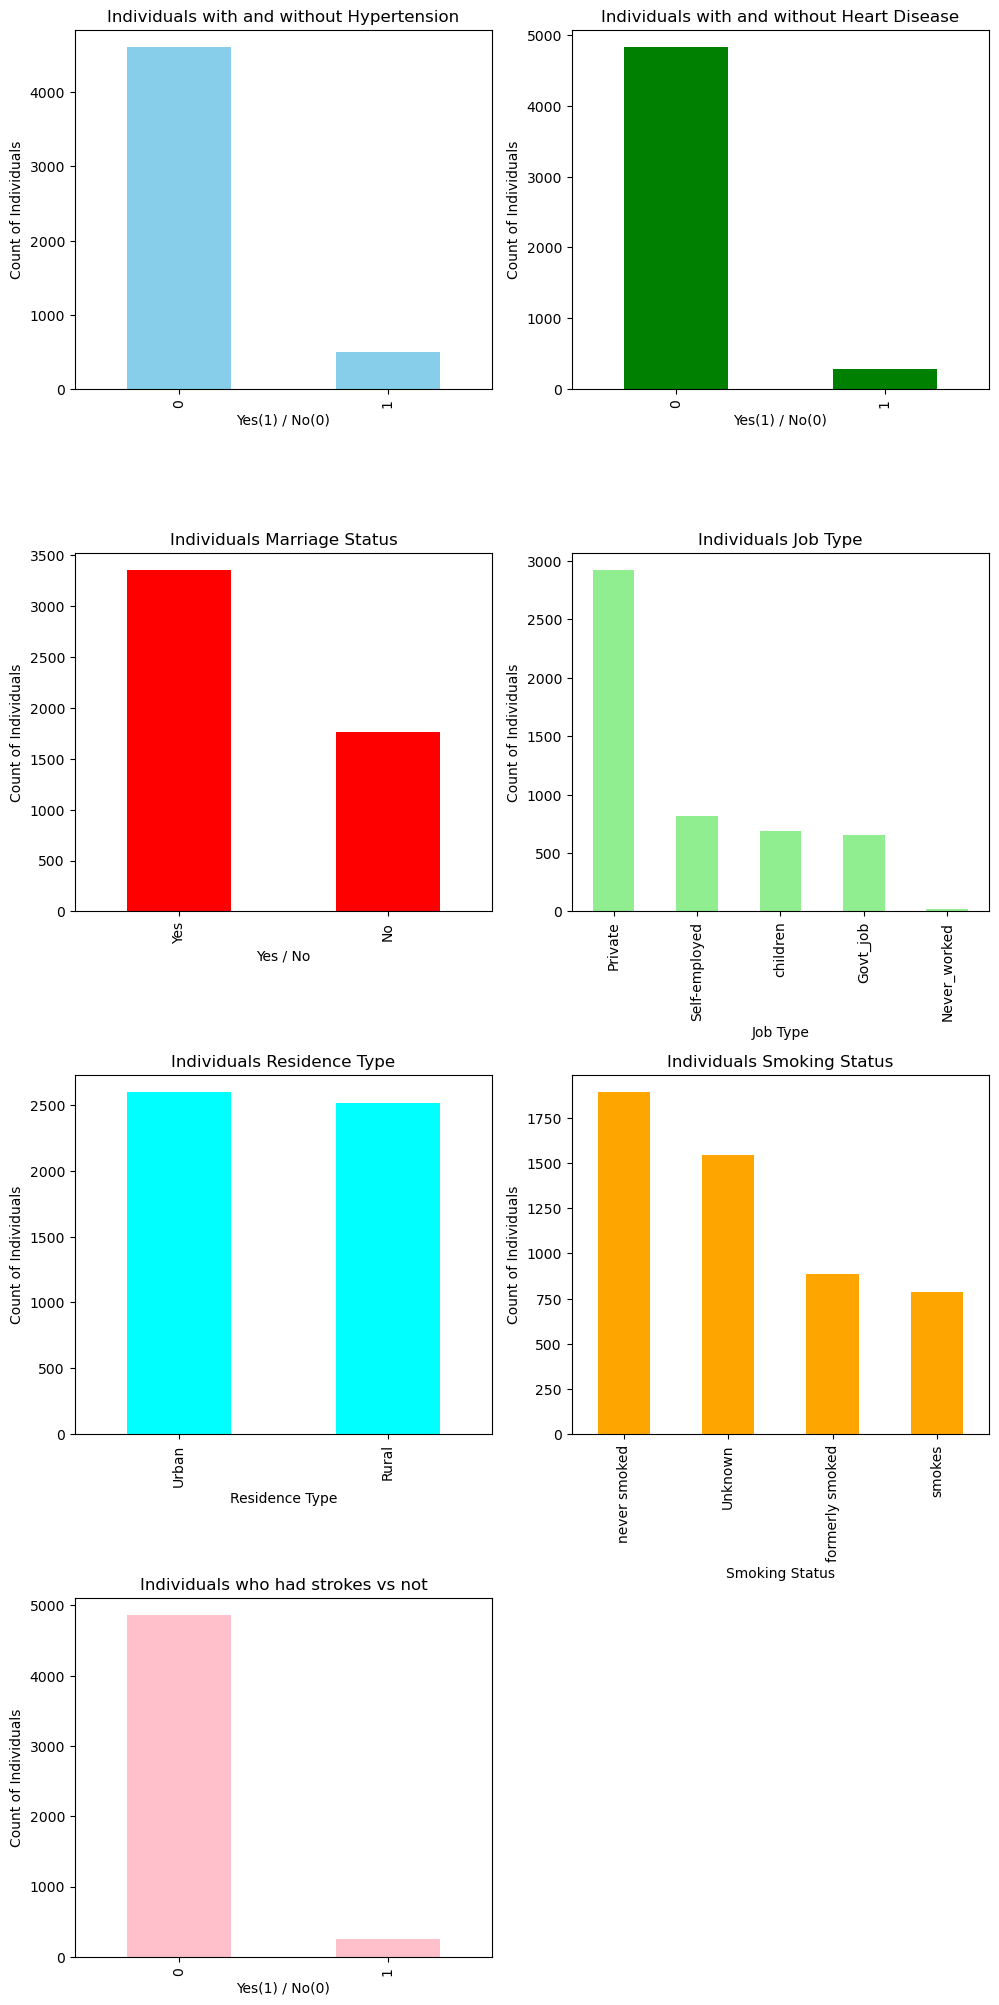

In [88]:
# EDA - looking at the bar plots of binary values

# creating the grid space
fig = plt.figure(figsize=(25, 25))
gs = gridspec.GridSpec(nrows=5, ncols=5)


# Bar plot of Hypertension
ax3 = fig.add_subplot(gs[0, 0])
hypertension = stroke['Hypertension']
hyp_count = hypertension.value_counts()
hyp_count.plot(kind='bar', color='skyblue')
plt.xlabel('Yes(1) / No(0)')
plt.ylabel('Count of Individuals')
plt.title('Individuals with and without Hypertension')

# Bar plot of Hypertension
ax4 = fig.add_subplot(gs[0, 1])
hrt_dis = stroke['Heart Disease']
heart_count = hrt_dis.value_counts()
heart_count.plot(kind='bar', color='green')
plt.xlabel('Yes(1) / No(0)')
plt.ylabel('Count of Individuals')
plt.title('Individuals with and without Heart Disease')

# Bar plot of Marriage Status
ax4 = fig.add_subplot(gs[1, 0])
marriage = stroke['Ever Married']
marriage_count = marriage.value_counts()
marriage_count.plot(kind='bar', color='red')
plt.xlabel('Yes / No')
plt.ylabel('Count of Individuals')
plt.title('Individuals'' Marriage Status')


# Bar plot of Work Type
ax4 = fig.add_subplot(gs[1, 1])
job = stroke['Work Type']
job_count = job.value_counts()
job_count.plot(kind='bar', color='lightgreen')
plt.xlabel('Job Type')
plt.ylabel('Count of Individuals')
plt.title('Individuals'' Job Type')

# Bar plot of Residence Type
ax4 = fig.add_subplot(gs[2, 0])
home = stroke['Residence Type']
home_count = home.value_counts()
home_count.plot(kind='bar', color='cyan')
plt.xlabel('Residence Type')
plt.ylabel('Count of Individuals')
plt.title('Individuals'' Residence Type')

# Bar plot of Smoking Habits
ax4 = fig.add_subplot(gs[2, 1])
smoke = stroke['Smoking Status']
smoke_count = smoke.value_counts()
smoke_count.plot(kind='bar', color='orange')
plt.xlabel('Smoking Status')
plt.ylabel('Count of Individuals')
plt.title('Individuals'' Smoking Status')

# Bar plot of Smoking Habits
ax4 = fig.add_subplot(gs[3, 0])
stroke_stat = stroke['Stroke']
stroke_count = stroke_stat.value_counts()
stroke_count.plot(kind='bar', color='pink')
plt.xlabel('Yes(1) / No(0)')
plt.ylabel('Count of Individuals')
plt.title('Individuals who had strokes vs not')

fig.tight_layout()
plt.show()